<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/notebooks/LCROSS_Plume_Water_Detection_Data_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LCROSS Plume Water Detection Data



The goal of this section is to make a dataframe of the molecular abundance from the LCROSS impact in the Cabeus crater near the Lunar South Pole. The original data is from (Colaprete, et al., 2010) Table 2.


Colaprete, A., Schultz, P., Heldmann, J., Wooden, D., Shirley, M., Ennico, K., .
.. & Goldstein, D. (2010). Detection of water in the LCROSS ejecta plume. Science, 330(6003), 463-468.

These data were published in percentages relative to water. This is a hard way to read the data so Chris Dreyer and George Sowers converted them to weight percent. They provided the updated table to us in a personel communication Spring 2020.


------------------------------------------------------------------------
![ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris [2].png](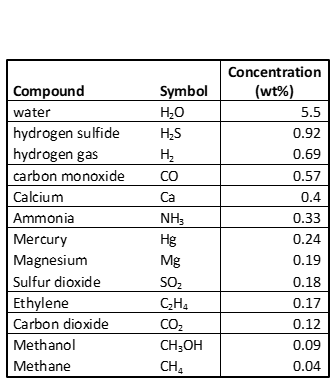) 

In [ ]:
#import key packages
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#first method of creating a pandas dataframe. In this we manually created a dictionary of the values and converted to a dataframe. 
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04]}
df = pd.DataFrame(data)
df

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,calcium,Ca,0.40
5,ammonia,NH3,0.33
6,mercury,Hg,0.24
7,magnesium,Mg,0.19
8,sulfur dioxide,SO2,0.18
9,ethylene,C2H4,0.17


In [ ]:
#alternate method of loading the data to a dataframe. The values were typed into an Excel file and saved as csv on GitHub. Then read from there. 
df2 = pd.read_csv('https://raw.githubusercontent.com/denizd1/GEOL557_Project/main/data/ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris.csv')
df2

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,Calcium,Ca,0.40
5,Ammonia,NH3,0.33
6,Mercury,Hg,0.24
7,Magnesium,Mg,0.19
8,Sulfur dioxide,SO2,0.18
9,Ethylene,C2H4,0.17


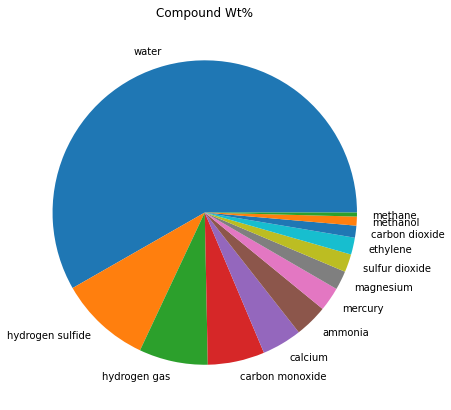

In [ ]:
# Creating plot with the weight percent of all the molecules observed by LCROSS
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df['Concentration (wt%)'], labels = df['Compound']) 
plt.title('Compound Wt%')
# show plot 
plt.show() 

In [ ]:
#add a column with a boolian for the the presence of carbon or not.
df['Carbon']=df["Symbol"].str.startswith('C')
df

,Compound,Symbol,Concentration (wt%),Carbon
0,water,H2O,5.50,False
1,hydrogen sulfide,H2S,0.92,False
2,hydrogen gas,H2,0.69,False
3,carbon monoxide,CO,0.57,True
4,calcium,Ca,0.40,True
5,ammonia,NH3,0.33,False
6,mercury,Hg,0.24,False
7,magnesium,Mg,0.19,False
8,sulfur dioxide,SO2,0.18,False
9,ethylene,C2H4,0.17,True


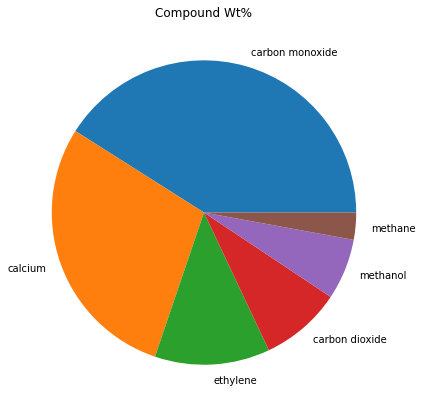

In [ ]:
# Creating plot showing only the carbon beariing compounds
fig = plt.figure(figsize =(10, 7)) 
c_only = pd.DataFrame(df.groupby(['Carbon']))
c_only = c_only.iloc[1][1]
plt.pie(c_only['Concentration (wt%)'], labels = c_only['Compound']) 
plt.title('Compound Wt%')
# show plot 
plt.show() 
#df_first = df[(df.Pclass == 1)]

We need to count atoms in the molecules. We could do this by hand in a couple of minutes but would like to do it using extensable tools. We found a package calle ChemParse. https://pypi.org/project/chemparse/

In [ ]:
pip install chemparse #https://pypi.org/project/chemparse/

  Created wheel for chemparse: filename=chemparse-0.1.0-cp36-none-any.whl size=2913 sha256=27ec2be69af5a0c56c2955068890e411558f0193017b3ad7fa7bcf8789784184
  Stored in directory: /root/.cache/pip/wheels/6d/14/a5/1fee5885ee2793f331fe97ce98392ab4ee79b02147bbb4a59d
Successfully built chemparse


In [ ]:
import chemparse #import chemparse 
print(chemparse.parse_formula("C6H12O6")) #test with given example

{'C': 6.0, 'H': 12.0, 'O': 6.0}


In [ ]:
df['Symbol'].to_list()[0] #learning how to use the chemparse by simplifying the input to the first molecule in our dataframe

'H2O'

In [ ]:
aa=chemparse.parse_formula(df['Symbol'].to_list()[0]) #learning how to use the chemparse by looking at the output type
print(type(aa))

<class 'dict'>


In [ ]:
elements=[]
for i in range(len(df['Symbol'].to_list())):
  elements.append(chemparse.parse_formula(df['Symbol'].to_list()[i]))
elements

[{'H': 2.0, 'O': 1.0},
 {'H': 2.0, 'S': 1.0},
 {'H': 2.0},
 {'C': 1.0, 'O': 1.0},
 {'Ca': 1.0},
 {'H': 3.0, 'N': 1.0},
 {'Hg': 1.0},
 {'Mg': 1.0},
 {'O': 2.0, 'S': 1.0},
 {'C': 2.0, 'H': 4.0},
 {'C': 1.0, 'O': 2.0},
 {'C': 1.0, 'H': 4.0, 'O': 1.0},
 {'C': 1.0, 'H': 4.0}]

In [ ]:
print(type(elements)) #list of dictionaries 

<class 'list'>


In [ ]:
df_e = pd.DataFrame(elements) #convert the list to a Pandas dataframe
df_e

,H,O,S,C,Ca,N,Hg,Mg
0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
9,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [ ]:
df_m = pd.concat([df, df_e], axis=1, sort=False) #combine the results of parsing the molecules with the original dataframe
df_m=df_m.fillna(0) #fill the NaN with 0
df_m

,Compound,Symbol,Concentration (wt%),Carbon,H,O,S,C,Ca,N,Hg,Mg
0,water,H2O,5.50,False,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hydrogen sulfide,H2S,0.92,False,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,hydrogen gas,H2,0.69,False,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,carbon monoxide,CO,0.57,True,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,calcium,Ca,0.40,True,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,ammonia,NH3,0.33,False,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,mercury,Hg,0.24,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,magnesium,Mg,0.19,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,sulfur dioxide,SO2,0.18,False,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ethylene,C2H4,0.17,True,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
df_m.iloc[:,4:12].sum()

H     21.0
O      7.0
S      2.0
C      6.0
Ca     1.0
N      1.0
Hg     1.0
Mg     1.0
dtype: float64

In [ ]:
df_atoms=[]
df_atoms=pd.DataFrame(df_m.iloc[:,4:12]).sum().reset_index(name='AtomCount') #calculate the sum of each unique atomic type for all molecules observed
df_atoms
#df_SurvLastName=df.groupby(by=['Survived','LastNameLetter']).size().reset_index(name='LetterCount')
#df_SurvLastName1.hist(column='percent', bins=27)
#df_m.loc['H','O','S','C','Ca','N','Hg','Mg']

,index,AtomCount
0,H,21.0
1,O,7.0
2,S,2.0
3,C,6.0
4,Ca,1.0
5,N,1.0
6,Hg,1.0
7,Mg,1.0


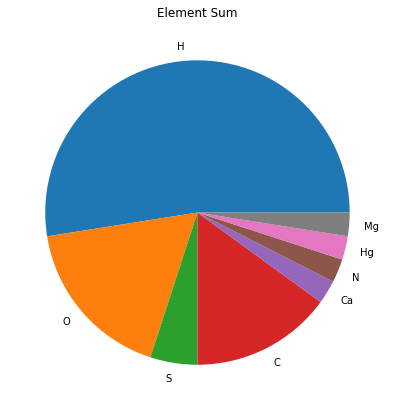

In [ ]:
# Creating plot with the weight percent of all the molecules observed by LCROSS
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df_atoms['AtomCount'], labels=df_atoms['index']) 
plt.title('Element Sum')
# show plot 
plt.show() 

#End of compelete work. Below are the attempts at the next steps. 

In [ ]:
#Make a dataframe of the periodic table of elements from this location- https://gist.github.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee 
df_pt=pd.read_csv('https://gist.githubusercontent.com/hdanque/87c96e740803f74f7a93f7356438183b/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')
df_pt.head()

In [ ]:
df_pt.loc['Symbol','AtomicMass'] #I want just the two columns from the Periodic table with te Symbol and Atomic mass and then I want to match the Symbol field to the previous dataframe. 

Next I want to make a column of atomic weights and then multiply the weights by the number of atoms to get the atomic weight percent. A description of the process is here. 
https://www.scribd.com/doc/74247139/How-to-Convert-Atomic-Percent-to-Weight-Percent-and-Vice-Versa


In [ ]:
#alternate method of merging dataframes.
#merge them together, aligning rows based on their labels in the index
#df_merged = pd.merge(left=df_econ, right=df_race, how='inner', left_index=True, right_index=True)
#df_merged.head()
